In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import dask.dataframe as dd
# import vaex
import gc

import warnings
warnings.filterwarnings('ignore')

%run utility.py

In [3]:
# !pip install vaex

In [4]:
def Classify(sampling_method,data_array):  # x_train,x_test, y_train,  y_test):

    print("====================================")
    print("============="+sampling_method+"=============")
    print("====================================")
       
    x_train,y_train, x_test, y_test=load_imb_data(data_array,sampling_method)
    
    # print("After load_imb_data")
    
    logistic_model=LogisticRegression(penalty='l2',C=1.0, solver='liblinear').fit(x_train,y_train)  # 'l2', 'l1', 'elasticnet'
    y_pred=logistic_model.predict(x_test)
    Print_Result(y_test, y_pred,"ROC_LogisticRegression_"+sampling_method+".jpg")

In [10]:
# data_array = load_data('./mid_pkl2/', 1)
# # data_array = load_data('./mid_pkl2/')

# new_arr = data_array[:, :-4]
# last_column = data_array[:, -1]
# data_array = np.column_stack((new_arr, last_column))

# column_names = [f'{i}' for i in range(1, data_array.shape[1])]
# column_names.append('y')
# df = pd.DataFrame(data_array, columns=column_names)
# # df

In [19]:
# import pandas as pd
# import glob

# # Path to the folder containing CSV files
# csv_files = glob.glob('./*.csv')  # Adjust the folder path

# # Read and concatenate all CSV files into one DataFrame
# # df = dd.concat([dd.read_csv(f) for f in csv_files], ignore_index=True)
# df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# # Display the merged DataFrame
# df


In [20]:
# def load_embedding_file(csv_filename):


#     # df=pd.read_csv('clinvar_20240805.noncoding_with_dna_with_embedding.csv')
#     # df = df.drop(['CHROM', 'REF', 'ALT', 'START', 'SIZE', 'dna'], axis=1)
    
#     # Specify dtypes manually for columns where dtype inference is problematic
#     dtype = {'CHROM': 'object'}  # Replace '1.0' with the correct column name or index
    
#     # Load the Dask DataFrame with the specified dtypes
#     df = dd.read_csv(csv_filename, dtype=dtype)
#     # df = dd.read_csv(csv_filename)
    
#     # Inspect to get column names
#     df_pandas_head = df.head(1)  # This pulls a small chunk of data into memory to inspect the columns
    
#     # Define new column names based on the number of columns
#     # column_names = [f'{i}' for i in range(1, len(df_pandas_head.columns) - 4)]
#     # column_names.extend(['CHROM', 'REF', 'ALT', 'POS', 'y'])

#     column_names = ['CHROM', 'REF', 'ALT', 'START', 'SIZE','y', 'dna']
#     column_names.extend([f'{i}' for i in range(1, len(df_pandas_head.columns) - 6)])

#     # Assign new column names to the DataFrame
#     df.columns = column_names
#     df = df.drop(['CHROM', 'REF', 'ALT', 'START', 'SIZE', 'dna'], axis=1)


#     first_col = df.iloc[:, 0]  # Get the first column
#     df = df.drop(df.columns[0], axis=1)  # Drop the first column
#     df[first_col.name] = first_col  # Add it back as the last column

#     # Compute the Dask DataFrame into a Pandas DataFrame
#     df_pandas = df.compute()
#     data_array = df_pandas.to_numpy()

#     return data_array


import pandas as pd
import glob


def load_embedding_file(csv_file_dir):
    

    # Path to the folder containing CSV files
    csv_files = glob.glob(csv_file_dir)  # Adjust the folder path
    
    # Read and concatenate all CSV files into one DataFrame
    df = dd.concat([dd.read_csv(f) for f in csv_files], ignore_index=True)
    # df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
    
    
    # df = dd.read_csv(csv_filename)
    
    df = df.drop(['chromosome', 'ref_forward_sequence', 'alt_forward_sequence', 'position'], axis=1)
    
    
    first_col = df.iloc[:, 0]  # Get the first column
    df = df.drop(df.columns[0], axis=1)  # Drop the first column
    df[first_col.name] = first_col  # Add it back as the last column
    
    df_pandas = df.compute()
    data_array = df_pandas.to_numpy()
    return data_array


## noncoding.csv

In [17]:
def Classify(sampling_method,data_array):  # x_train,x_test, y_train,  y_test):

    print("====================================")
    print("============="+sampling_method+"=============")
    print("====================================")
       
    x_train,y_train, x_test, y_test=load_imb_data(data_array,sampling_method)
    
    print("After load_imb_data")
    del data_array
    gc.collect()
    
    logistic_model=LogisticRegression(penalty='l2',C=1.0, solver='liblinear').fit(x_train,y_train)  # 'l2', 'l1', 'elasticnet'
    y_pred=logistic_model.predict(x_test)
    Print_Result(y_test, y_pred,"ROC_LogisticRegression_"+sampling_method+".jpg")

In [11]:
# df=pd.read_csv('clinvar_20240805.noncoding_with_dna_with_embedding.csv')
# df = df.drop(['CHROM', 'REF', 'ALT', 'START', 'SIZE', 'dna'], axis=1)

=============UNDERSAMPLE=============
0.0    1028
1.0    1028
Name: count, dtype: int64
(2056, 256) (2056,) (19152, 256) (19152,)
After load_imb_data
              precision    recall  f1-score   support

         0.0       0.99      0.57      0.72     18895
         1.0       0.02      0.58      0.03       257

    accuracy                           0.57     19152
   macro avg       0.50      0.57      0.38     19152
weighted avg       0.98      0.57      0.71     19152

f1_score 0.03450285581070055
precision_score 0.017784186493631338
recall_score 0.5758754863813229
roc_auc_score 0.5716371345640406
confusion_matrix
 [[10721  8174]
 [  109   148]]


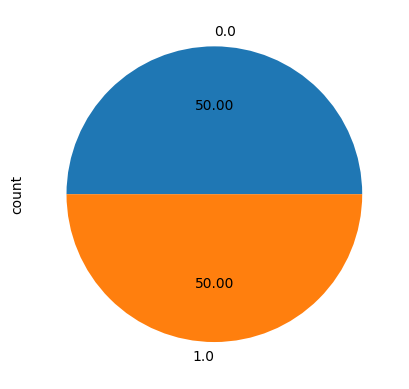

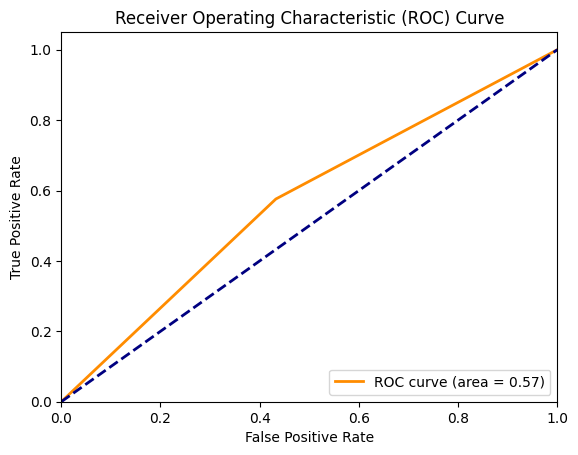

ROC AUC score: 0.5716371345640406
CPU times: user 3.65 s, sys: 345 ms, total: 4 s
Wall time: 4.26 s


In [21]:
%%time

# data_array = load_embedding_file('./clinvar_20240805.noncoding_with_dna_with_embedding.csv')
data_array = load_embedding_file('./*.csv')

Classify("UNDERSAMPLE",data_array)  #x_train, x_test, y_train, y_test)

# Classify("UNDERSAMPLE",data_array)  #x_train, x_test, y_train, y_test)
# Classify("OVERSAMPLE",data_array)
# Classify("ADASYN",data_array)
# Classify("SMOTE",data_array)
# Classify("SMOTEENN",data_array)
# Classify("NEARMISS",data_array)
# Classify("TOMEKLINKS",data_array)
# Classify("CLUSTERCENTROIDS",data_array)

=============UNDERSAMPLE=============
0.0    37430
1.0    37430
Name: count, dtype: int64
(74860, 768) (74860,) (112038, 768) (112038,)
After load_imb_data
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87    102680
         1.0       0.26      0.81      0.39      9358

    accuracy                           0.79    112038
   macro avg       0.62      0.80      0.63    112038
weighted avg       0.92      0.79      0.83    112038

f1_score 0.39330131117746336
precision_score 0.25976609390540867
recall_score 0.8093609745672152
roc_auc_score 0.7995821234347569
confusion_matrix
 [[81097 21583]
 [ 1784  7574]]


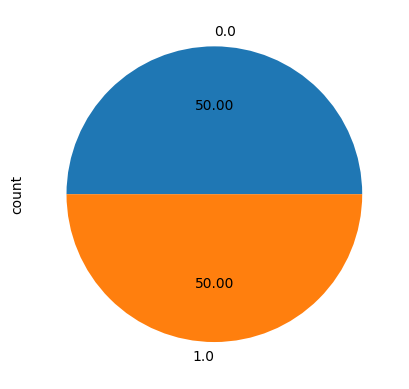

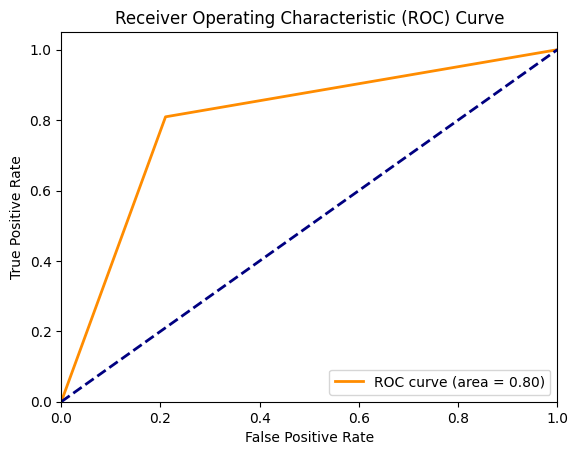

ROC AUC score: 0.7995821234347569
CPU times: user 1min 34s, sys: 6.16 s, total: 1min 40s
Wall time: 1min 56s


In [10]:
%%time


import dask.dataframe as dd

def load_embedding_file(csv_filename):
    dtype = {'1': 'object'}  # Set as object initially

    # Load the Dask DataFrame with the specified dtypes
    df = dd.read_csv(csv_filename, dtype=dtype)

    # Convert non-numeric entries to NaN and then fill or drop as necessary
    df['1'] = dd.to_numeric(df['1'], errors='coerce')  # Convert to numeric, set invalid to NaN

    # Inspect to get column names
    df_pandas_head = df.head(1)  # This pulls a small chunk of data into memory to inspect the columns

    # Assign new column names to the DataFrame
    # df.columns = column_names
    # df = df.drop(['CHROM', 'REF', 'ALT', 'POS'], axis=1)

    # Define new column names based on the number of columns
    # column_names = [f'{i}' for i in range(1, len(df_pandas_head.columns) - 4)]
    # column_names.extend(['CHROM', 'REF', 'ALT', 'POS', 'y'])
    
    column_names = ['CHROM', 'REF', 'ALT', 'START', 'SIZE',  'y', 'dna']
    column_names.extend([f'{i}' for i in range(1, len(df_pandas_head.columns) - 4)])

    
    df = df.drop(['CHROM', 'REF', 'ALT', 'START', 'SIZE', 'dna'], axis=1)
    
    first_col = df.iloc[:, 0]  # Get the first column
    df = df.drop(df.columns[0], axis=1)  # Drop the first column
    df[first_col.name] = first_col  # Add it back as the last column
    

    
    # Compute the Dask DataFrame into a Pandas DataFrame
    df_pandas = df.compute()
    data_array = df_pandas.to_numpy()

    return data_array


data_array = load_embedding_file('clinvar_20240805.missense_matched_embedding.csv')
Classify("UNDERSAMPLE",data_array)

## Noncoding.csv

=============UNDERSAMPLE=============
0.0    1028
1.0    1028
Name: count, dtype: int64
(2056, 768) (2056,) (19152, 768) (19152,)
              precision    recall  f1-score   support

         0.0       0.99      0.68      0.81     18895
         1.0       0.03      0.68      0.05       257

    accuracy                           0.68     19152
   macro avg       0.51      0.68      0.43     19152
weighted avg       0.98      0.68      0.80     19152

f1_score 0.054256314312441545
precision_score 0.028260516485301285
recall_score 0.6770428015564203
roc_auc_score 0.6801990932894565
confusion_matrix
 [[12912  5983]
 [   83   174]]


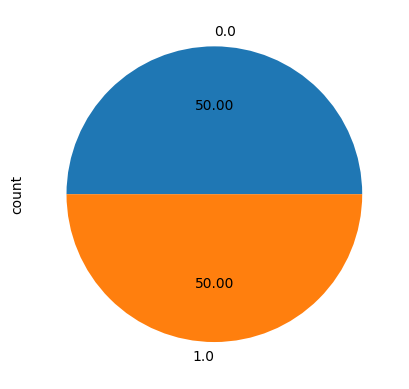

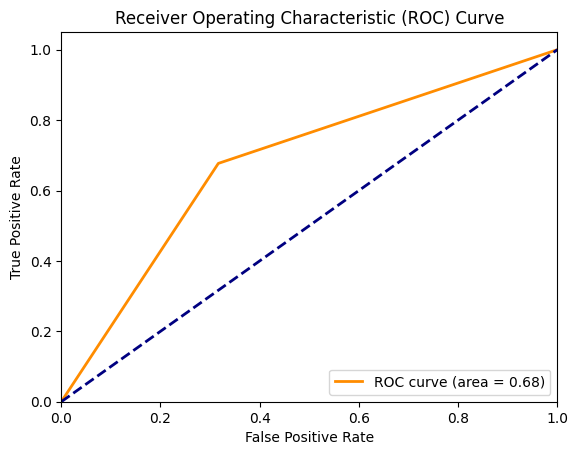

ROC AUC score: 0.6801990932894565
=============OVERSAMPLE=============
0.0    75579
1.0    75579
Name: count, dtype: int64
(151158, 768) (151158,) (19152, 768) (19152,)
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     18895
         1.0       0.03      0.59      0.06       257

    accuracy                           0.76     19152
   macro avg       0.51      0.68      0.46     19152
weighted avg       0.98      0.76      0.85     19152

f1_score 0.06255144032921811
precision_score 0.03302194221160113
recall_score 0.5914396887159533
roc_auc_score 0.6779373622198448
confusion_matrix
 [[14444  4451]
 [  105   152]]


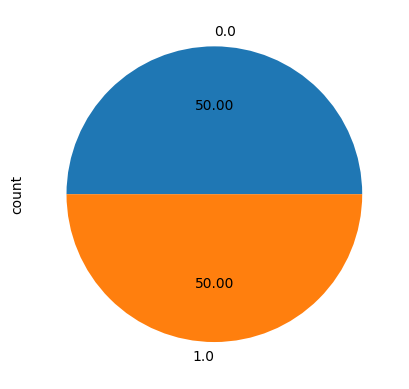

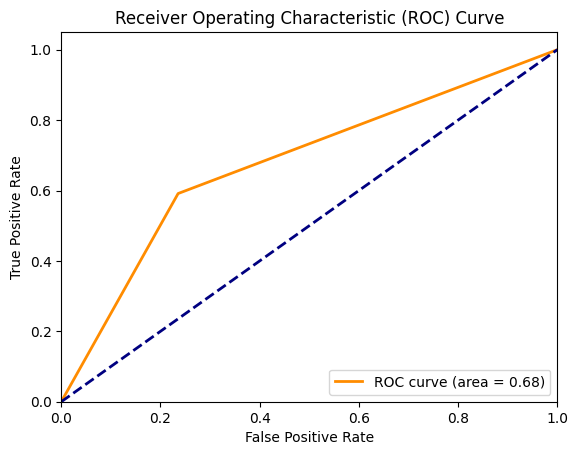

ROC AUC score: 0.6779373622198448
=============ADASYN=============
(150903, 768) (150903,) (19152, 768) (19152,)
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     18895
         1.0       0.03      0.61      0.06       257

    accuracy                           0.76     19152
   macro avg       0.51      0.69      0.46     19152
weighted avg       0.98      0.76      0.85     19152

f1_score 0.06359428456429864
precision_score 0.03353140916808149
recall_score 0.6147859922178989
roc_auc_score 0.6868849251907171
confusion_matrix
 [[14341  4554]
 [   99   158]]


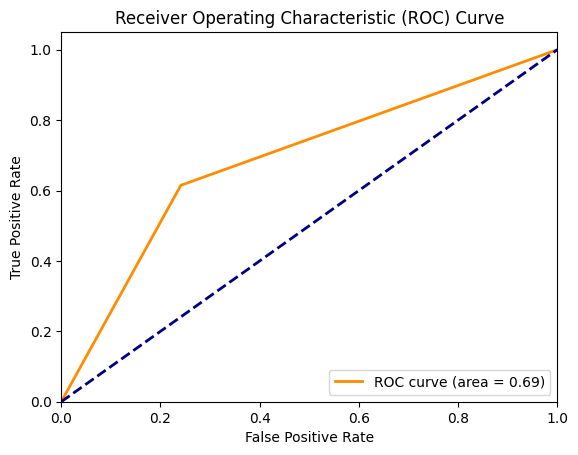

ROC AUC score: 0.6868849251907171
=============SMOTE=============
(151158, 768) (151158,) (19152, 768) (19152,)
              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87     18895
         1.0       0.03      0.59      0.07       257

    accuracy                           0.78     19152
   macro avg       0.51      0.68      0.47     19152
weighted avg       0.98      0.78      0.86     19152

f1_score 0.06562364189482835
precision_score 0.03475258918296893
recall_score 0.5875486381322957
roc_auc_score 0.6827925778647719
confusion_matrix
 [[14701  4194]
 [  106   151]]


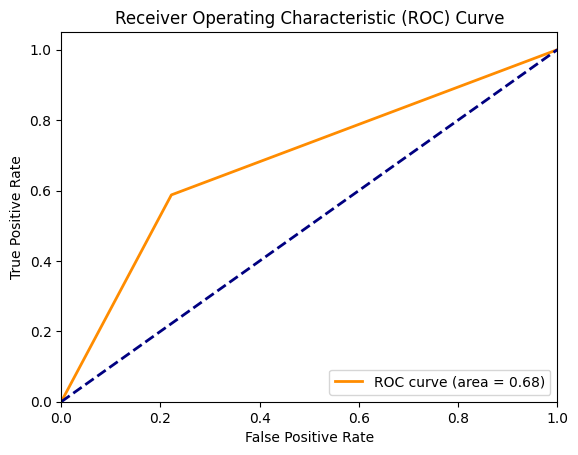

ROC AUC score: 0.6827925778647719
=============SMOTEENN=============
(138957, 768) (138957,) (19152, 768) (19152,)
              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84     18895
         1.0       0.03      0.64      0.06       257

    accuracy                           0.73     19152
   macro avg       0.51      0.69      0.45     19152
weighted avg       0.98      0.73      0.83     19152

f1_score 0.05966371361417465
precision_score 0.03128555176336746
recall_score 0.642023346303502
roc_auc_score 0.685817177253365
confusion_matrix
 [[13786  5109]
 [   92   165]]


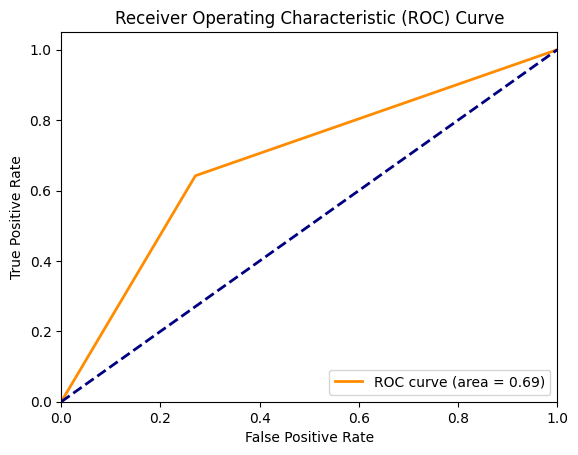

ROC AUC score: 0.685817177253365
=============NEARMISS=============
(2056, 768) (2056,) (19152, 768) (19152,)
              precision    recall  f1-score   support

         0.0       0.99      0.37      0.54     18895
         1.0       0.01      0.69      0.03       257

    accuracy                           0.37     19152
   macro avg       0.50      0.53      0.28     19152
weighted avg       0.98      0.37      0.53     19152

f1_score 0.02876767676767677
precision_score 0.01468889255652748
recall_score 0.6926070038910506
roc_auc_score 0.530346899669791
confusion_matrix
 [[ 6955 11940]
 [   79   178]]


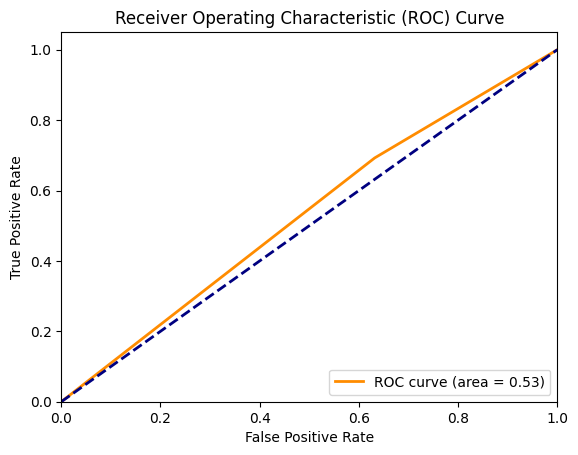

ROC AUC score: 0.530346899669791
=============TOMEKLINKS=============
(76298, 768) (76298,) (19152, 768) (19152,)
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     18895
         1.0       0.71      0.02      0.04       257

    accuracy                           0.99     19152
   macro avg       0.85      0.51      0.52     19152
weighted avg       0.98      0.99      0.98     19152

f1_score 0.03787878787878788
precision_score 0.7142857142857143
recall_score 0.019455252918287938
roc_auc_score 0.5096747024051613
confusion_matrix
 [[18893     2]
 [  252     5]]


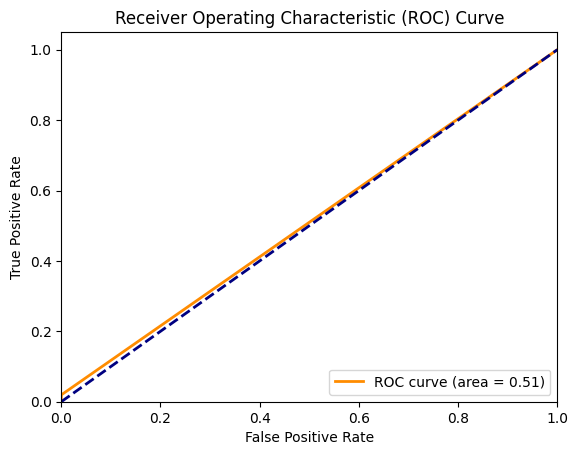

ROC AUC score: 0.5096747024051613
=============CLUSTERCENTROIDS=============
(2056, 768) (2056,) (19152, 768) (19152,)
              precision    recall  f1-score   support

         0.0       0.99      0.62      0.77     18895
         1.0       0.02      0.67      0.05       257

    accuracy                           0.63     19152
   macro avg       0.51      0.65      0.41     19152
weighted avg       0.98      0.63      0.76     19152

f1_score 0.045973956949242625
precision_score 0.023799697344889254
recall_score 0.6731517509727627
roc_auc_score 0.6488013319563468
confusion_matrix
 [[11799  7096]
 [   84   173]]


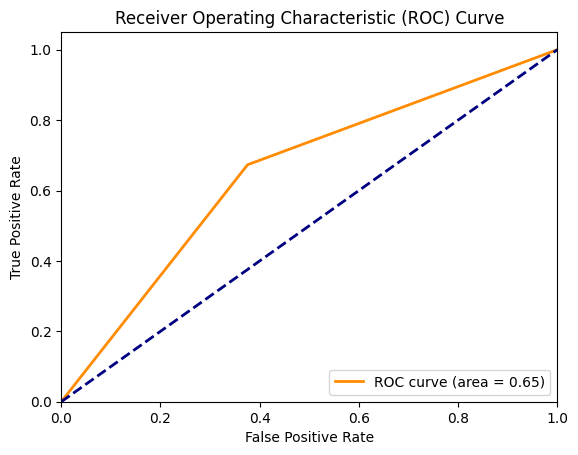

ROC AUC score: 0.6488013319563468


In [8]:
data_array = load_embedding_file('./Homo_sapiens.gpn.noncoding.csv')


Classify("UNDERSAMPLE",data_array)  #x_train, x_test, y_train, y_test)
Classify("OVERSAMPLE",data_array)
Classify("ADASYN",data_array)
Classify("SMOTE",data_array)
Classify("SMOTEENN",data_array)
Classify("NEARMISS",data_array)
Classify("TOMEKLINKS",data_array)
Classify("CLUSTERCENTROIDS",data_array)

In [6]:
import numpy as np
import pandas as pd
df=pd.read_csv('clinvar_20240805.noncoding_with_dna_with_embedding.csv')
df = df.drop(['CHROM', 'REF', 'ALT', 'START', 'SIZE', 'dna'], axis=1)

first_col = df.iloc[:, 0]  # Get the first column
df = df.drop(df.columns[0], axis=1)  # Drop the first column
df[first_col.name] = first_col  # Add it back as the last column

df

/scratch/local/46033385/ipykernel_607712/3988542373.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('clinvar_20240805.noncoding_with_dna_with_embedding.csv')


,1,2,3,4,5,6,7,8,9,10,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,y
0,0.334228,15.165188,3.746267,10.851512,-13.182909,5.876565,-7.879434,11.021838,5.209822,36.839250,...,-1.139671,-8.103537,-1.212238,5.960697,-6.418651,-23.156933,-13.076716,-4.507156,-1.472319,0
1,2.235798,16.274527,1.190474,13.395564,-8.386454,3.222415,-4.661484,10.143549,4.810452,40.380970,...,5.513604,-5.143791,0.327443,5.304109,-3.109378,-20.820324,-16.941652,-0.914045,2.229809,0
2,-0.007787,15.681893,-0.078960,12.323283,-9.819860,4.876490,-8.212646,9.933450,2.853481,41.256435,...,3.465170,-9.860449,-3.243864,6.088968,-6.381880,-17.310400,-13.117867,-4.461840,2.458006,0
3,-3.910741,18.410954,2.771927,12.428423,-7.119886,3.596903,-7.676476,9.591576,7.529558,39.627415,...,0.411715,-5.232091,0.275599,5.100416,-2.696604,-18.136280,-10.936369,-6.734768,4.158483,0
4,-3.910741,18.410954,2.771927,12.428423,-7.119886,3.596903,-7.676476,9.591576,7.529558,39.627415,...,0.411715,-5.232091,0.275599,5.100416,-2.696604,-18.136280,-10.936369,-6.734768,4.158483,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95755,3.329517,10.125616,5.999471,1.200820,-10.682112,2.376034,-7.387041,7.401613,6.047154,37.525390,...,-0.432241,-4.690749,-0.981235,3.694082,-7.702427,-22.396114,-10.551295,-4.492845,2.511119,0
95756,-2.237243,10.508144,2.914955,6.855159,-10.725988,4.994344,-3.252879,12.211556,1.997047,36.986614,...,-0.756835,-4.144951,-1.840076,2.778831,-5.697386,-23.044563,-10.186168,-7.087540,0.423014,0
95757,-0.850283,14.298471,7.588639,8.122217,-9.780461,-2.930724,-7.656448,11.543024,2.117618,42.294857,...,0.347926,-1.956744,1.056523,5.102149,-4.153150,-22.057858,-11.325311,-1.919361,1.248999,0
95758,1.404984,12.699022,-3.654075,4.820420,-9.907673,3.260519,-9.456821,12.021944,2.530741,43.916225,...,1.071028,-1.973776,0.759441,4.355421,-4.776135,-21.105650,-10.697568,-3.129432,-1.990727,0
